In [36]:
##Libraries Imported

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [3]:
##Loading the dataset

df = pd.read_csv('/content/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


###Preprocessing the data & EDA


In [4]:
print(df.shape)
print(df.info())
print(df.describe())

(21, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


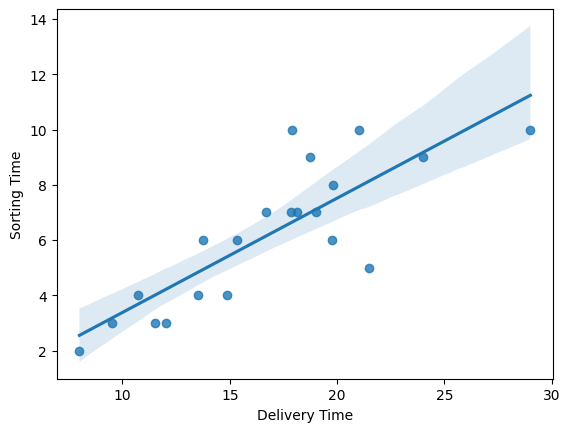

In [9]:
###Finding the insights

sns.regplot(x='Delivery Time', y='Sorting Time', data=df)
plt.savefig(fname='regplot.png')

###Inference = As the delivery time increases the sorting time also takes more time

###Model Planning


In [12]:
X = df['Sorting Time'].values.reshape(-1,1)
y = df['Delivery Time'].values.reshape(-1,1)

In [14]:
%%time
model = LinearRegression()
model_fit = model.fit(X, y)
print(model_fit)

LinearRegression()
CPU times: user 4.78 ms, sys: 0 ns, total: 4.78 ms
Wall time: 11.5 ms


In [18]:
coef = model_fit.coef_
print("The coef of the data is: ", coef)

The coef of the data is:  [[1.6490199]]


In [19]:
intercept = model_fit.intercept_
print("The intercept of the data is: ", intercept)

The intercept of the data is:  [6.58273397]


###Prediction using the model

In [28]:
pred = model_fit.predict(X)
print("The predicted values are: ",pred)

The predicted values are:  [[23.07293294]
 [13.17881356]
 [16.47685335]
 [21.42391304]
 [23.07293294]
 [16.47685335]
 [18.12587325]
 [11.52979366]
 [23.07293294]
 [21.42391304]
 [19.77489315]
 [13.17881356]
 [18.12587325]
 [11.52979366]
 [11.52979366]
 [13.17881356]
 [16.47685335]
 [18.12587325]
 [ 9.88077377]
 [18.12587325]
 [14.82783346]]


In [34]:
###New dastset with predicted data

new_dataset = pd.concat([df, pd.DataFrame(pred, columns=['Predicted Delivery Time'])], axis=1)
new_dataset.to_csv('new_dataset.csv', index=False)

In [40]:
### check r2_score, mean_squared_error

r2score = r2_score(y, pred)
print("The accuracy of the model over the data is: ", r2score)
mse = sqrt(mean_squared_error(y, pred))
print("The error produced by the model over the data is: ", mse)


The accuracy of the model over the data is:  0.6822714748417231
The error produced by the model over the data is:  2.7916503270617654
